In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

## 导入数据2020-04-08~2022-04-08

In [2]:
data = pd.read_excel('002714.xls').dropna()
data

,证券代码,证券名称,交易时间,开盘价,最高价,最低价,收盘价,涨跌,涨跌幅%,成交量,成交额
0,002714,牧原股份,2020-04-08,128.00,128.80,122.20,123.29,-5.010002,-3.904912,22863624.0,2.852943e+09
1,002714,牧原股份,2020-04-09,123.00,125.30,119.51,124.30,1.010002,0.819209,15894680.0,1.940317e+09
2,002714,牧原股份,2020-04-10,123.60,126.74,122.76,123.90,-0.400002,-0.321803,10437423.0,1.298218e+09
3,002714,牧原股份,2020-04-13,122.80,126.26,121.88,123.50,-0.400002,-0.322842,8850357.0,1.098932e+09
4,002714,牧原股份,2020-04-14,124.86,127.02,123.41,124.57,1.070000,0.866397,11089538.0,1.387366e+09
...,...,...,...,...,...,...,...,...,...,...,...
481,002714,牧原股份,2022-03-31,57.35,57.65,55.89,56.86,-0.489998,-0.854399,21296499.0,1.205859e+09
482,002714,牧原股份,2022-04-01,56.98,58.55,56.12,57.42,0.559998,0.984871,29360158.0,1.688880e+09
483,002714,牧原股份,2022-04-06,57.00,57.87,55.86,56.05,-1.369999,-2.385926,25959486.0,1.469875e+09
484,002714,牧原股份,2022-04-07,55.51,56.20,53.81,54.11,-1.939999,-3.461193,37485922.0,2.049576e+09


In [3]:
data['收益率'] = data['收盘价'].pct_change()# 计算收益率
data.dropna(inplace=True)
data

,证券代码,证券名称,交易时间,开盘价,最高价,最低价,收盘价,涨跌,涨跌幅%,成交量,成交额,收益率
1,002714,牧原股份,2020-04-09,123.00,125.30,119.51,124.30,1.010002,0.819209,15894680.0,1.940317e+09,0.008192
2,002714,牧原股份,2020-04-10,123.60,126.74,122.76,123.90,-0.400002,-0.321803,10437423.0,1.298218e+09,-0.003218
3,002714,牧原股份,2020-04-13,122.80,126.26,121.88,123.50,-0.400002,-0.322842,8850357.0,1.098932e+09,-0.003228
4,002714,牧原股份,2020-04-14,124.86,127.02,123.41,124.57,1.070000,0.866397,11089538.0,1.387366e+09,0.008664
5,002714,牧原股份,2020-04-15,124.00,125.29,121.41,121.67,-2.900002,-2.328010,12938497.0,1.585999e+09,-0.023280
...,...,...,...,...,...,...,...,...,...,...,...,...
481,002714,牧原股份,2022-03-31,57.35,57.65,55.89,56.86,-0.489998,-0.854399,21296499.0,1.205859e+09,-0.008544
482,002714,牧原股份,2022-04-01,56.98,58.55,56.12,57.42,0.559998,0.984871,29360158.0,1.688880e+09,0.009849
483,002714,牧原股份,2022-04-06,57.00,57.87,55.86,56.05,-1.369999,-2.385926,25959486.0,1.469875e+09,-0.023859
484,002714,牧原股份,2022-04-07,55.51,56.20,53.81,54.11,-1.939999,-3.461193,37485922.0,2.049576e+09,-0.034612


## 用历史模拟法计算 VaR 值

In [4]:
VaR_1 = np.percentile(data['收益率'].dropna(),1)
VaR_1

-0.0744067979563174

In [5]:
VaR_5 = np.percentile(data['收益率'].dropna(),5)
VaR_5

-0.04528507390977823

In [6]:
VaR_10 = np.percentile(data['收益率'].dropna(),10)
VaR_10

-0.0335299994380968

画图

Text(0.5, 1.0, '002714.SZ')

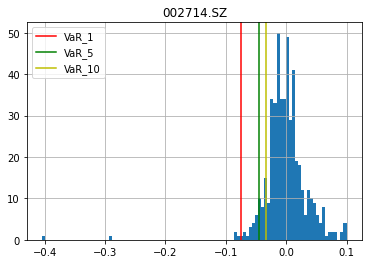

In [7]:
data['收益率'].hist(bins=100)
plt.axvline(VaR_1, color='r', label='VaR_1')
plt.axvline(VaR_5, color='g', label='VaR_5')
plt.axvline(VaR_10, color='y', label='VaR_10')
plt.legend()
plt.title('002714.SZ') 

### 计算未来持有一天的VaR

In [8]:
from scipy.stats import norm

In [9]:
mu = data['收益率'].mean()
sigma = data['收益率'].std()

在99%的置信度下，该股票的最大可能下跌的幅度

In [10]:
z_1 = -norm.ppf(0.99)
VaR_01 = z_1 * sigma - mu
VaR_01

-0.0856201216513285

在95%的置信度下，该股票的最大可能下跌的幅度

In [11]:
z_5 = -norm.ppf(0.95)
VaR_05 = z_5 * sigma - mu
VaR_05

-0.06026291219433873

## 用Monte Carlo模拟法计算VaR

### 模拟未来一年的股价，来计算VaR

In [12]:
days = 365 # 预测的时间长度为一年365天的
dt = 1/days
sigs = sigma*np.sqrt(dt) # 漂移项
drt = mu*dt # 扰动项
pe = data['收盘价'].iloc[-1] # 最后一天股价

In [13]:
pt = [] # 全部模拟数据列表
# 蒙特卡洛模拟
for i in range(10000): # 模拟次数10000次
    pn = pe # 初始化股价
    p = [] # 单次模拟情况
    p.append(pe) # 计入初始股价
    for days in range(1,365): # 365天
        pn = pn + pn*(np.random.normal(drt, sigs)) # 产生新股价
        p.append(pn)
    pt.append(p)
pt = pd.DataFrame(pt).T  # 把全部历史数据转置一下便于作图时数据与matplotlib库要求的形式一致

In [14]:
simulations = pt.iloc[-1:].T  # simulations为模拟的n次的n个最终价格

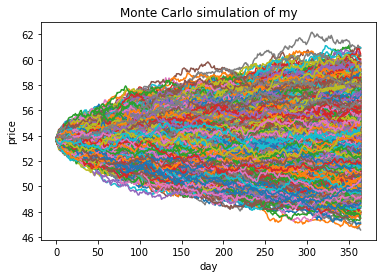

In [15]:
plt.plot(pt)
plt.title('Monte Carlo simulation of my')
plt.xlabel('day')
plt.ylabel('price')
plt.show()

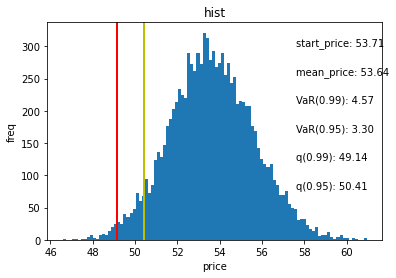

In [16]:
q1 = np.percentile(simulations, 1) # 1%分位数位置
q5 = np.percentile(simulations, 5) # 5%分位数位置

plt.figtext(0.7, 0.8, "start_price: %.2f" % data['收盘价'].iloc[-1])
plt.figtext(0.7, 0.7, "mean_price: %.2f" % simulations.mean())
plt.figtext(0.7, 0.6, "VaR(0.99): %.2f" % (data['收盘价'].iloc[-1] - q1)) # 以初始价格为基准，减去最低1%的股价，得到所能承受的最大损失（1%）
plt.figtext(0.7, 0.5, "VaR(0.95): %.2f" % (data['收盘价'].iloc[-1] - q5))
plt.figtext(0.7, 0.4, "q(0.99): %.2f" % q1)
plt.figtext(0.7, 0.3, "q(0.95): %.2f" % q5)
plt.axvline(x=q1, linewidth=2, color='r') # 置信区间位置
plt.axvline(x=q5, linewidth=2, color='y') # 置信区间位置

plt.title('hist')
plt.xlabel('price')
plt.ylabel('freq')
plt.hist(simulations,bins=100)
plt.show()